In [1]:
# Import
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
from sklearn import svm 


In [2]:
# Reading in our synthetic data
df = pd.read_csv("Project Data - Sheet1.csv")
df

,Age,high_bp,high_chol,BMI,physical_activity,gender,diabetes_yes_no
0,11,0,0,22.4,1,0,0
1,16,1,1,21.0,0,0,0
2,13,0,1,20.1,1,0,0
3,12,1,0,31.3,0,1,1
4,7,1,0,16.6,1,1,0
...,...,...,...,...,...,...,...
95,73,0,1,26.1,1,0,1
96,55,1,0,22.2,1,0,0
97,73,1,1,26.4,1,1,1
98,66,1,0,19.5,1,1,0


In [3]:
df.dtypes

Age                    int64
high_bp                int64
high_chol              int64
BMI                  float64
physical_activity      int64
gender                 int64
diabetes_yes_no        int64
dtype: object

In [4]:
# distribution of diabetes vs non diabetes
yes_diabetes = df[df["diabetes_yes_no"] == 1]
no_diabetes = df[df["diabetes_yes_no"] == 0]


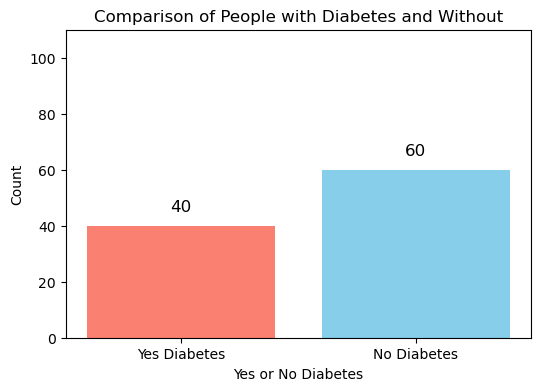

In [5]:
yes_count = len(yes_diabetes)
no_count = len(no_diabetes)

plt.figure(figsize=(6,4))
plt.bar(["Yes Diabetes", "No Diabetes"], [yes_count, no_count], color=["salmon", "skyblue"])

# Add labels and title
plt.xlabel("Yes or No Diabetes")
plt.ylabel("Count")
plt.title("Comparison of People with Diabetes and Without")
plt.ylim(0, max(yes_count, no_count) + 50)  

for i, count in enumerate([yes_count, no_count]):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)


plt.show()

In [6]:
df.corr()

,Age,high_bp,high_chol,BMI,physical_activity,gender,diabetes_yes_no
Age,1.000000,-0.153447,-0.016337,0.215430,-0.000485,-0.256650,0.256146
high_bp,-0.153447,1.000000,-0.060012,-0.168358,-0.020332,0.140253,-0.122474
high_chol,-0.016337,-0.060012,1.000000,-0.042761,0.207022,-0.119038,-0.106166
BMI,0.215430,-0.168358,-0.042761,1.000000,-0.195010,0.100546,0.868949
physical_activity,-0.000485,-0.020332,0.207022,-0.195010,1.000000,0.070476,-0.149410
gender,-0.256650,0.140253,-0.119038,0.100546,0.070476,1.000000,0.114516
diabetes_yes_no,0.256146,-0.122474,-0.106166,0.868949,-0.149410,0.114516,1.000000


In [23]:
# Set Features and Target Variable
X = df[['Age', 'high_bp', 'high_chol', 'BMI', 'physical_activity', 'gender']]  
Y = df[['diabetes_yes_no']]  

# Logistic Regression

Ridge Regularization:
Intercept: [-4.06749451]
Coefficients:
Age: -0.001463734189712895
high_bp: -0.5958450893107635
high_chol: -0.6555277818085311
BMI: 0.20617976961290063
physical_activity: -0.582588743255692
gender: -0.037473739622302035


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

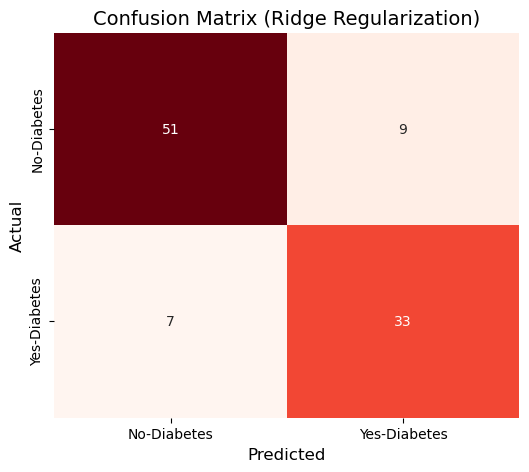

Accuracy (Ridge): 0.84
Classification Report (Ridge):
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        60
           1       0.79      0.82      0.80        40

    accuracy                           0.84       100
   macro avg       0.83      0.84      0.83       100
weighted avg       0.84      0.84      0.84       100



In [24]:
class_names = ["No-Diabetes", "Yes-Diabetes"]

# Logistic Regression with Ridge Regularization (L2)
logistic_regression_ridge = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# Perform 5-fold cross-validation
y_pred_ridge = cross_val_predict(logistic_regression_ridge, X, Y, cv=5)

logistic_regression_ridge.fit(X, Y)

print("Ridge Regularization:")
print("Intercept:", logistic_regression_ridge.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, logistic_regression_ridge.coef_[0]):
    print(f"{feature}: {coef}")

conf_matrix_ridge = confusion_matrix(Y, y_pred_ridge)

plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix_ridge, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (Ridge Regularization)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Evaluate performance
accuracy_ridge = accuracy_score(Y, y_pred_ridge)
print("Accuracy (Ridge):", accuracy_ridge)

print("Classification Report (Ridge):")
print(classification_report(Y, y_pred_ridge))


Lasso Regularization:
Intercept: [-14.14868444]
Coefficients:
Age: 0.008961637434722723
high_bp: 0.0
high_chol: -0.23279575847015035
BMI: 0.5605332035123798
physical_activity: 0.0
gender: 0.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

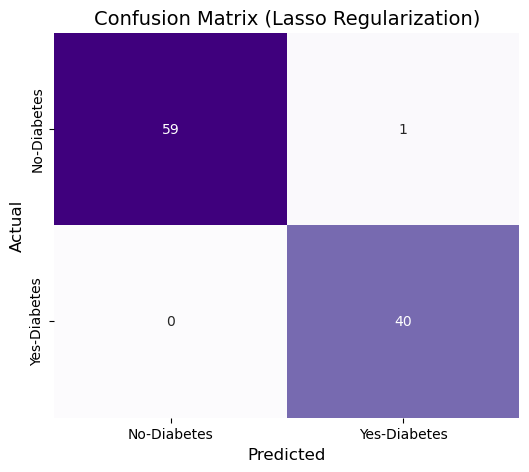

Accuracy (Lasso): 0.99
Classification Report (Lasso):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        40

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [25]:
class_names = ["No-Diabetes", "Yes-Diabetes"]

# Logistic Regression with Ridge Regularization (L1)
logistic_regression_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Perform 5-fold cross-validation
y_pred_lasso = cross_val_predict(logistic_regression_lasso, X, Y, cv=5)

logistic_regression_lasso.fit(X, Y)

print("Lasso Regularization:")
print("Intercept:", logistic_regression_lasso.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, logistic_regression_lasso.coef_[0]):
    print(f"{feature}: {coef}")

conf_matrix_ridge = confusion_matrix(Y, y_pred_lasso)

plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix_ridge, annot=True, fmt='d', cmap='Purples', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (Lasso Regularization)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Evaluate performance
accuracy_lasso = accuracy_score(Y, y_pred_lasso)
print("Accuracy (Lasso):", accuracy_lasso)

print("Classification Report (Lasso):")
print(classification_report(Y, y_pred_lasso))


# SVM Linear Function

In [26]:
svm_linear = svm.SVC(kernel='linear', C = 1)

In [27]:
# Cross Validation
lin_pred = cross_val_predict(svm_linear, X, Y, cv=5)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [28]:
# Fit the model
svm_linear.fit(X, Y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [29]:
# Predict target variable
Y_pred = svm_linear.predict(X)

Linear Regularization:
Intercept: [-41.77601878]
Coefficients:
Age: 0.01562210231528316
high_bp: 0.0
high_chol: 0.0
BMI: 1.6458616794260064
physical_activity: 0.2771889300427643
gender: 3.885780586188048e-16


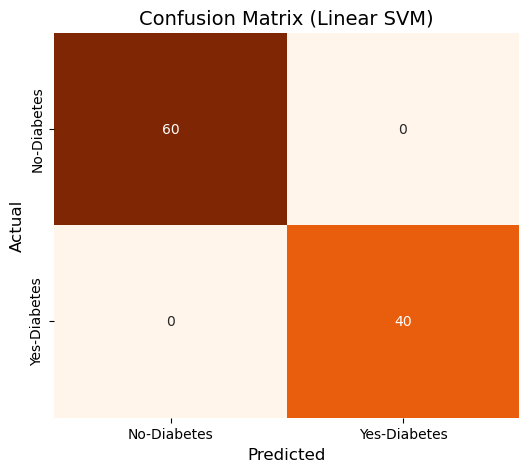

Accuracy (Linear): 1.0
Classification Report (Linear):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [30]:
class_names = ["No-Diabetes", "Yes-Diabetes"]

conf_matrix_linear = confusion_matrix(Y, Y_pred)
print("Linear Regularization:")
print("Intercept:", svm_linear.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, svm_linear.coef_[0]):
    print(f"{feature}: {coef}")

plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Oranges', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (Linear SVM)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Evaluate performance
accuracy_linear = accuracy_score(Y, Y_pred)
print("Accuracy (Linear):", accuracy_linear)

print("Classification Report (Linear):")
print(classification_report(Y, Y_pred))

# SVM Radial Basis Function

In [31]:
svm_rbf = svm.SVC(kernel="rbf", gamma=0.7, C = 1)


In [32]:
cv = cross_val_predict(svm_rbf, X, Y, cv=5)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [33]:
svm_rbf.fit(X, Y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=0.7)

In [34]:
Y_pred_rbf = svm_rbf.predict(X)

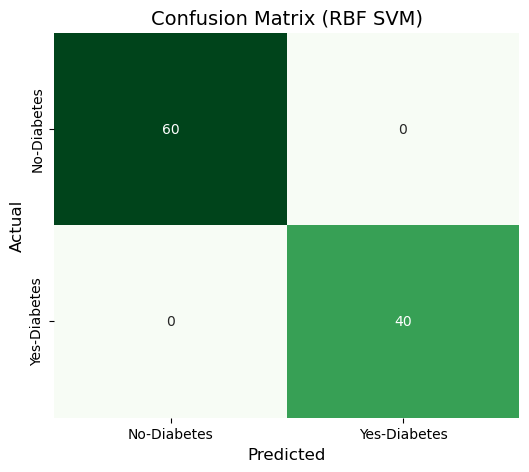

Accuracy (RBF): 1.0
Classification Report (RBF):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        40

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [35]:
class_names = ["No-Diabetes", "Yes-Diabetes"]

conf_matrix_rbf = confusion_matrix(Y, Y_pred_rbf)


plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (RBF SVM)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Evaluate performance
accuracy_rbf = accuracy_score(Y, Y_pred_rbf)
print("Accuracy (RBF):", accuracy_rbf)

print("Classification Report (RBF):")
print(classification_report(Y, Y_pred_rbf))

# Excluding BMI Analysis 

## Excluding BMI Ridge

In [36]:
# Set Features and Target Variable
X = df[['Age', 'high_bp', 'high_chol', 'physical_activity', 'gender']]  
Y = df[['diabetes_yes_no']]  

Ridge Regularization:
Intercept: [-0.94827081]
Coefficients:
Age: 0.022703124783536338
high_bp: -0.4986128040425745
high_chol: -0.3078596159547355
physical_activity: -0.6527247385183291
gender: 0.6555886881835834


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

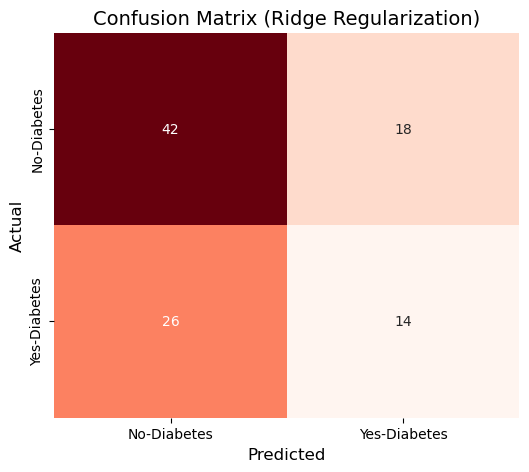

Accuracy (Ridge): 0.56
Classification Report (Ridge):
              precision    recall  f1-score   support

           0       0.62      0.70      0.66        60
           1       0.44      0.35      0.39        40

    accuracy                           0.56       100
   macro avg       0.53      0.52      0.52       100
weighted avg       0.55      0.56      0.55       100



In [37]:
class_names = ["No-Diabetes", "Yes-Diabetes"]

# Logistic Regression with Ridge Regularization (L2)
logistic_regression_ridge = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# Perform 5-fold cross-validation
y_pred_ridge = cross_val_predict(logistic_regression_ridge, X, Y, cv=5)

logistic_regression_ridge.fit(X, Y)

print("Ridge Regularization:")
print("Intercept:", logistic_regression_ridge.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, logistic_regression_ridge.coef_[0]):
    print(f"{feature}: {coef}")

conf_matrix_ridge = confusion_matrix(Y, y_pred_ridge)

plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix_ridge, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (Ridge Regularization)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Evaluate performance
accuracy_ridge = accuracy_score(Y, y_pred_ridge)
print("Accuracy (Ridge):", accuracy_ridge)

print("Classification Report (Ridge):")
print(classification_report(Y, y_pred_ridge))


## Excluding BMI Lasso

Lasso Regularization:
Intercept: [-1.0028676]
Coefficients:
Age: 0.022018589047750305
high_bp: -0.3912853287615343
high_chol: -0.19427852427932893
physical_activity: -0.6004087724314752
gender: 0.5691431392695756


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

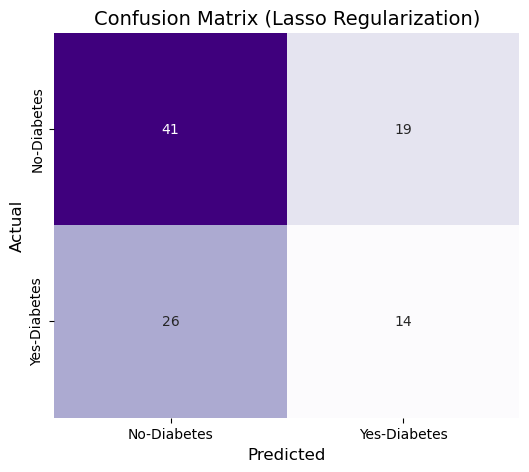

Accuracy (Lasso): 0.55
Classification Report (Lasso):
              precision    recall  f1-score   support

           0       0.61      0.68      0.65        60
           1       0.42      0.35      0.38        40

    accuracy                           0.55       100
   macro avg       0.52      0.52      0.51       100
weighted avg       0.54      0.55      0.54       100



In [38]:
class_names = ["No-Diabetes", "Yes-Diabetes"]

# Logistic Regression with Ridge Regularization (L1)
logistic_regression_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Perform 5-fold cross-validation
y_pred_lasso = cross_val_predict(logistic_regression_lasso, X, Y, cv=5)

logistic_regression_lasso.fit(X, Y)

print("Lasso Regularization:")
print("Intercept:", logistic_regression_lasso.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, logistic_regression_lasso.coef_[0]):
    print(f"{feature}: {coef}")

conf_matrix_ridge = confusion_matrix(Y, y_pred_lasso)

plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix_ridge, annot=True, fmt='d', cmap='Purples', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (Lasso Regularization)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Evaluate performance
accuracy_lasso = accuracy_score(Y, y_pred_lasso)
print("Accuracy (Lasso):", accuracy_lasso)

print("Classification Report (Lasso):")
print(classification_report(Y, y_pred_lasso))


In [43]:
svm_linear = svm.SVC(kernel='linear', C = 1)

In [44]:
# Cross Validation
lin_pred = cross_val_predict(svm_linear, X, Y, cv=5)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [46]:
# Fit the model
svm_linear.fit(X, Y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [47]:
# Predict target variable
Y_pred = svm_linear.predict(X)

## Excluding BMI Linear SVM

Linear Regularization:
Intercept: [-0.88113445]
Coefficients:
Age: 0.023799219005013583
high_bp: -0.6664583939638646
high_chol: -0.2625767508212391
physical_activity: -0.760602489684123
gender: 0.8327670237847951


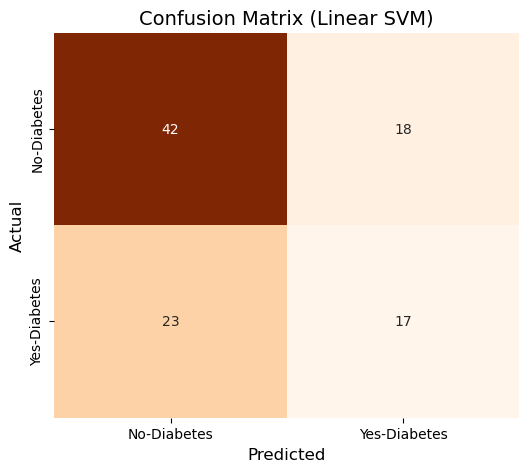

Accuracy (Linear): 0.59
Classification Report (Linear):
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        60
           1       0.49      0.42      0.45        40

    accuracy                           0.59       100
   macro avg       0.57      0.56      0.56       100
weighted avg       0.58      0.59      0.58       100



In [48]:
class_names = ["No-Diabetes", "Yes-Diabetes"]

conf_matrix_linear = confusion_matrix(Y, Y_pred)
print("Linear Regularization:")
print("Intercept:", svm_linear.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, svm_linear.coef_[0]):
    print(f"{feature}: {coef}")

plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Oranges', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (Linear SVM)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Evaluate performance
accuracy_linear = accuracy_score(Y, Y_pred)
print("Accuracy (Linear):", accuracy_linear)

print("Classification Report (Linear):")
print(classification_report(Y, Y_pred))

In [40]:
svm_rbf = svm.SVC(kernel="rbf", gamma=0.7, C = 1)


In [41]:
cv = cross_val_predict(svm_rbf, X, Y, cv=5)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [42]:
svm_rbf.fit(X, Y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=0.7)

In [49]:
Y_pred_rbf = svm_rbf.predict(X)

## Excluding BMI Radial Basis Function SVM

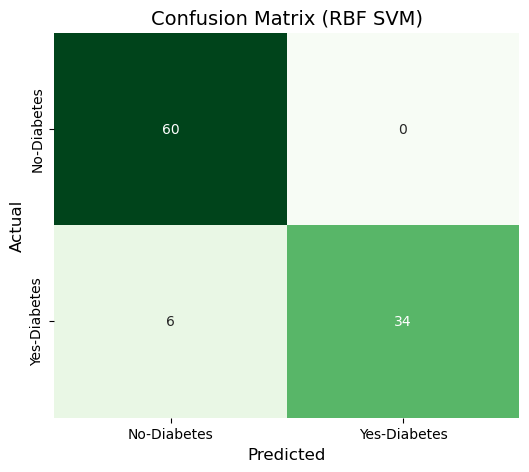

Accuracy (RBF): 0.94
Classification Report (RBF):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.85      0.92        40

    accuracy                           0.94       100
   macro avg       0.95      0.93      0.94       100
weighted avg       0.95      0.94      0.94       100



In [50]:
class_names = ["No-Diabetes", "Yes-Diabetes"]

conf_matrix_rbf = confusion_matrix(Y, Y_pred_rbf)


plt.figure(figsize=(6, 5))
sn.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=class_names, yticklabels=class_names)

plt.title("Confusion Matrix (RBF SVM)", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Evaluate performance
accuracy_rbf = accuracy_score(Y, Y_pred_rbf)
print("Accuracy (RBF):", accuracy_rbf)

print("Classification Report (RBF):")
print(classification_report(Y, Y_pred_rbf))